In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#from sklearn.decomposition import PCA
from numpy.linalg import eig
import seaborn as sns

In [2]:
left = np.load("./matrix_source/video_3_left_s.mp4.npy")
mid = np.load("./matrix_source/video_3_mid_s.mp4.npy")
right = np.load("./matrix_source/video_3_right_s.mp4.npy")

切600<br>
  1.保持長度一致

In [3]:
left_600 = left[:600,]
mid_600 = mid[:600,]
right_600 = right[:600,]
M = np.hstack((left_600,mid_600,right_600)).T
M.shape

(6, 600)

pca 是照書上寫出來的

In [4]:
def plot_finction(x,title="title"):
    plt.plot(np.arange(x.shape[0]) , x[:,1] ,"red" ,label="Y")
    plt.plot(np.arange(x.shape[0]) , x[:,0] , "green",label="X")
    red_patch = mpatches.Patch(color='red', label='Y')
    green_patch = mpatches.Patch(color='green', label='X')
    plt.legend(handles=[red_patch,green_patch])
    plt.title(title)
def pca(M):
    m , n = M.shape
    mn = np.mean(M, axis=1)
    M_m = M.T-mn
    Cx = (1/(n-1))*M_m.T@M_m
    D,V=eig(Cx)
    return M_m.T,D,V

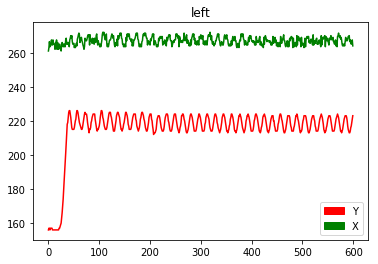

In [5]:
plot_finction(left_600,title="left")

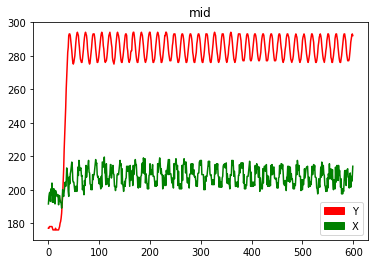

In [6]:
plot_finction(mid_600,title="mid")

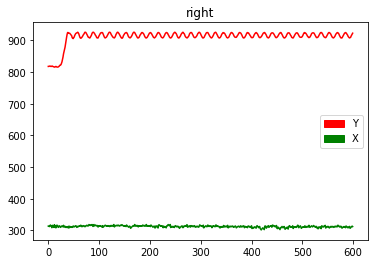

In [7]:
plot_finction(right_600,title="right")

In [8]:
M_normalize, D, V = pca(M)
M_pca = V.T @ M_normalize

In [9]:
M_normalize.shape

(6, 600)

In [10]:
D.shape

(6,)

In [11]:
V.shape

(6, 6)

因太長所以畫前150

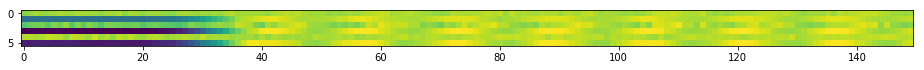

In [12]:
plt.figure(figsize=(16,16))
plt.imshow(M_normalize[:,:150])

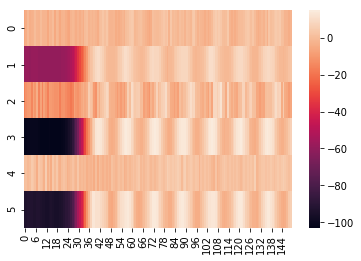

In [13]:
ax = sns.heatmap(M_normalize[:,:150])

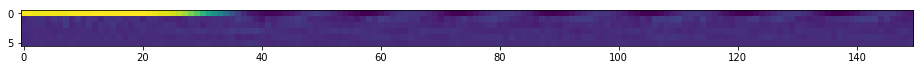

In [14]:
plt.figure(figsize=(16,16))
plt.imshow(M_pca[:,:150])

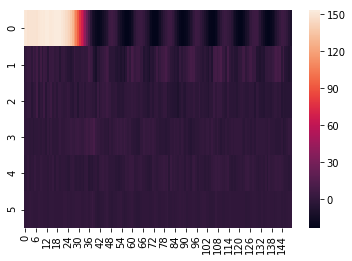

In [15]:
ax = sns.heatmap(M_pca[:,:150])

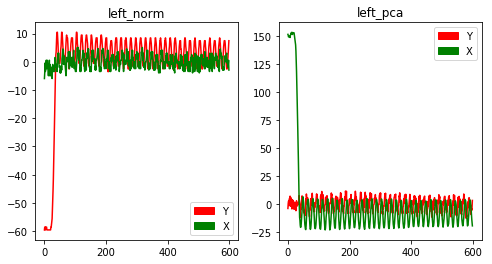

In [16]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_finction(M_normalize[range(0,2),:].T,title="left_norm")
plt.subplot(122)
plot_finction(M_pca[range(0,2),:].T,title="left_pca")

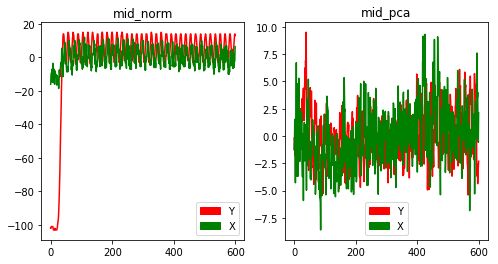

In [17]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_finction(M_normalize[range(2,4),:].T,title="mid_norm")
plt.subplot(122)
plot_finction(M_pca[range(2,4),:].T,title="mid_pca")

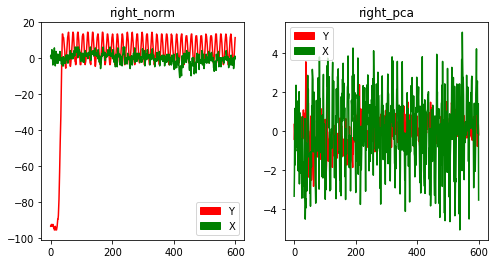

In [18]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_finction(M_normalize[range(4,6),:].T,title="right_norm")
plt.subplot(122)
plot_finction(M_pca[range(4,6),:].T,title="right_pca")